# Анализ объявлений о продаже квартир для определения рыночной стоимости

Данный проект посвящён анализу данных сервиса Яндекс.Недвижимость, включающего архив объявлений о продаже квартир в Санкт-Петербурге и прилегающих населённых пунктах.

Цель проекта — установить ключевые параметры, влияющие на стоимость недвижимости, и создать основу для автоматизированной системы, способной оценивать рыночную стоимость объектов, выявлять аномальные значения и предотвращать мошеннические действия.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение общей информации о продажах квартир из архива объявлений. 

С целью изучения общей информации, хранящейся в архиве о продаже квартир в Санкт-Петербурге и соседних населённых пунктов, выведем на экран первые 10 строк таблицы, а так же сводную информацию о структуре данных. Для визуальной оценки распределения данных построим гистограммы для всех числовых столбцов таблицы. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.1f}'.format
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,"3,700,000.0",37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,"52,996.0","19,143.0",0.0,NaN,0.0,NaN,155.0
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,False,False,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,"5,400,000.0",61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,"50,898.0","15,008.0",0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

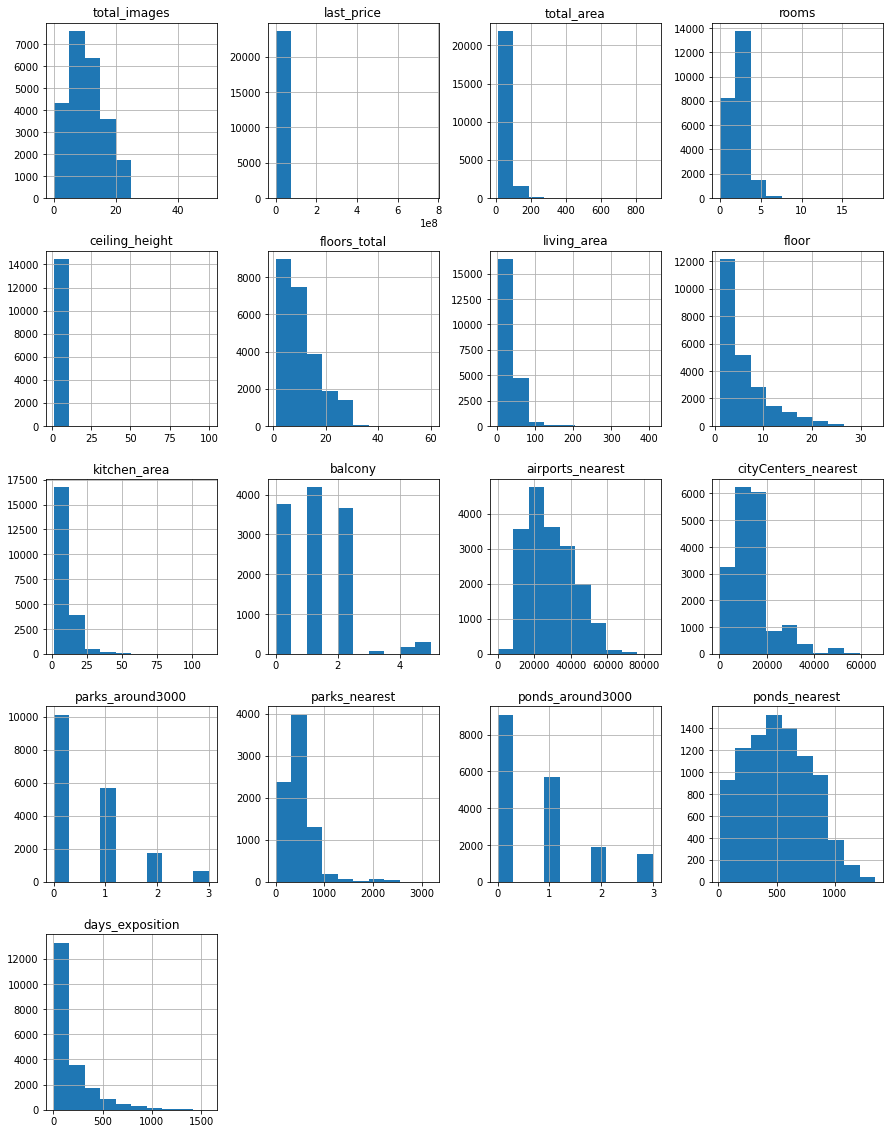

In [4]:
df.hist(figsize=(15,20))
plt.show()

**Выводы**:
* В представленой на анализ таблице 23699 строк и 22 столбца. Предварительно можно утверждать, что для проведения исследования данных достаточно. 
* Наблюдается нарушение стиля в названиях столбцов.
* Количество значений в столбцах различно, что говорит о наличии пропусков.
* Есть столбцы, в которых тип данных не соответствует их смысловому содержанию. 
* Форма некоторых гистограмм свидетельствует о наличии аномальных значений.

### Предобработка данных

#### Исправление стилистических ошибок

Исправим стиль в заголовках столбцов

In [5]:
df.columns=['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


#### Проверка данный на наличие дубликатов

Прежде чем приступить к анализу и заполнению пропущенных значений, проверим данные на наличие дубликатов

In [6]:
df.duplicated().sum()

0

Явных дубликатов нет. Проверим наличие неявных дубликатов. В исследуемых данных они могут присутствовать из-за различий в написании названий населенных пунктов.

In [7]:
print(df['locality_name'].sort_values().unique())
df['locality_name'].nunique()

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

364

In [8]:
df['locality_name'] =(
    df['locality_name']
    .str.replace('ё','е')
    .str.replace('городской поселок', 'поселок городского типа')
    .str.replace('коттеджный поселок', 'поселок')
    .str.replace('поселок при железнодорожной', 'поселок')
    .str.replace('садоводческое некоммерческое', 'садовое')
)

In [9]:
print(df['locality_name'].sort_values().unique())
df['locality_name'].nunique()

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалево' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'деревня Агалатово' 'деревня Аро' 'деревня Батово'
 'деревня Бегуницы' 'деревня Белогорка' 'деревня Большая Вруда'
 'деревня Большая Пустомержа' 'деревня Большие Колпаны'
 'деревня Большое Рейзино' 'деревня Большой Сабск' 'деревня Бор'
 'деревня Борисова Грива' 'деревня Ваганово' 'деревня Вартемяги'
 'деревня Вахнова Кара' 'деревня Выскатка' 'деревня Гарболово'
 'деревня Глинка' 'деревня Горбунки' 'деревня Гостилицы'
 'деревня Заклинье' 'деревня Заневка' 'деревня Зимитицы' 'деревня Извар

320

In [10]:
df.duplicated().sum()

0

Таким образом было обработано более 40 строк. Приведение названий населенных пунктов к общей форме не привело к образованию повторяющихся объявлений.

#### Заполнение пропусков в данных

В ходе предварительного исследования данных были обнажуженны пропуски в столбцах, содержащих как пользовательскую информацию, так и картографическую. Отсутствие картографических данных частично может объясняться тем, что пользователь не указал точный адрес квартиры. Но количество пропусков в этих столбцах различно, что указывает на наличие также и технической ошибки. 

Для начала проаналицируем пропуски в столбце с названиями населенных пунктов.

In [11]:
df.loc[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,"8,600,000.0",81.7,2016-04-15T00:00:00,3,3.5,5.0,50.8,2,NaN,False,False,8.8,0.0,NaN,"23,478.0","4,258.0",0.0,NaN,0.0,NaN,147.0
2033,6,"5,398,000.0",80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,False,False,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,"3,351,765.0",42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,False,False,10.7,0.0,NaN,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,276.0
2632,2,"5,130,593.0",62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,False,False,8.2,0.0,NaN,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,256.0
3574,10,"4,200,000.0",46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,False,False,6.5,0.0,NaN,"27,419.0","8,127.0",0.0,NaN,1.0,603.0,45.0
4151,17,"17,600,000.0",89.5,2014-12-09T00:00:00,2,3.0,8.0,39.6,7,NaN,False,False,13.4,0.0,NaN,"25,054.0","3,902.0",1.0,485.0,3.0,722.0,869.0
4189,7,"9,200,000.0",80.0,2015-12-10T00:00:00,3,4.0,4.0,52.3,3,False,False,False,10.4,0.0,NaN,"21,774.0","3,039.0",1.0,690.0,1.0,953.0,223.0
4670,1,"5,500,000.0",83.0,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,False,False,NaN,0.0,NaN,"26,534.0","5,382.0",1.0,446.0,1.0,376.0,350.0
5343,19,"13,540,000.0",85.5,2016-01-20T00:00:00,3,NaN,7.0,59.1,5,False,False,False,8.3,4.0,NaN,"10,556.0","9,538.0",1.0,67.0,0.0,NaN,303.0
5707,7,"3,700,000.0",30.0,2016-04-29T00:00:00,1,NaN,24.0,20.0,23,NaN,False,False,NaN,0.0,NaN,"21,460.0","16,788.0",0.0,NaN,1.0,170.0,49.0


Как видно из вышепредставленной таблицы, для части пропусков в названиях населенных пунктов есть картографические данные. Это значит, что пользователь указал точный адрес объекта недвижимости, но по техническим причинам, эта информация не попала в выгрузку. 

Согласно Яндекс Картам минимальное расстояние между центром Санкт-Петербурга и его границей составляет 10 километров. Это позволяет частично заполнить пропуски в названиях населенных пунктов на основе данных из столбца `city_centers_nearest`

In [12]:
df.loc[(df['locality_name'].isna()) & (df['city_centers_nearest'] < 10000), 'locality_name'] =\
       df['locality_name'].fillna('Санкт-Петербург')

Оставшиеся пропуски в этом столбце заполним значением `Unknown`

In [13]:
df['locality_name'] = df['locality_name'].fillna('Unknown')

Заполним пропуски в картографических данных в тех строках, где не указан населенный пункт. Поскольку данные в этих столбцах являются числовыми, замена их на `Unknown` приведет к потере ряда инструментов анализа, поэтому заполним их заведомо несуществующим значением `-1`

In [14]:
columns_to_replace = [
    'airports_nearest', 'city_centers_nearest',
    'parks_around_3000', 'parks_nearest',
    'ponds_around_3000', 'ponds_nearest'
]

for col in columns_to_replace:
    df.loc[df['locality_name'] == 'Unknown', col] = df.loc[df['locality_name'] == 'Unknown', col].fillna(-1)

Изучим данные на наличие зависимостей между пропусками в столбцах `parks_around_3000`и `parks_nearest`, а так же 
`ponds_around_3000` и `ponds_nearest`

In [15]:
df.loc[(df['ponds_nearest'].isna()) | (df['parks_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,"3,700,000.0",37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,поселок Парголово,"52,996.0","19,143.0",0.0,NaN,0.0,NaN,155.0
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,False,False,8.8,NaN,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,"9,470,000.0",72.9,2016-10-13T00:00:00,2,2.8,25.0,40.3,7,NaN,False,False,10.6,1.0,Санкт-Петербург,"19,424.0","4,489.0",0.0,NaN,1.0,806.0,519.0
23692,2,"1,350,000.0",30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,"3,100,000.0",59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,"2,500,000.0",56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Как видно из таблицы выше часть пропусков в столбцах `parks_nearest` и `ponds_nearest` появились там, где в соответствующих ячейках `parks_around_3000` и `ponds_around_3000` указано 0. Иными словами, в ряде случаев, когда в радиусе 3 км от квартиры нет парка или водоема, расстояние до ближайшего из них не рассчитывается. 
Заменим такие пропуски на значение большее, чем 3000, но маловероятное для реальных данных, например `3333`

In [16]:
df.loc[(df['parks_around_3000'] == 0), 'parks_nearest'] = 3333
df.loc[(df['ponds_around_3000'] == 0), 'ponds_nearest'] = 3333

Прочие пропуски в указанных столбцах разумнее будет запонить значением `-1`

In [17]:
columns_to_replace = [
    'parks_around_3000', 'parks_nearest',
    'ponds_around_3000', 'ponds_nearest'
]

for col in columns_to_replace:
    df[col] = df[col].fillna('-1')

Ряд пропусков в столбцах `airports_nearest` и `city_centers_nearest` для квартир расположенных в Ленинградской области можно заполнить средним значением по соответствующему населенному пункту. Все остальные пропуски в указанных столбцах заменим на `-1`.

In [18]:
columns_to_replace = ['airports_nearest', 'city_centers_nearest']

for col in columns_to_replace:
    df.loc[(df['locality_name'] == 'Санкт-Петербург'), col] =\
    df.loc[(df['locality_name'] == 'Санкт-Петербург'), col].fillna(-1)

In [19]:
for c in df['locality_name'].unique():
    for col in columns_to_replace:
        try:
            df.loc[(df['locality_name'] == c) & (df[col].isna()), col] = \
            df.loc[(df['locality_name'] == c), col].mean()
        except:
            df.loc[(df['locality_name'] == c), col] = df.loc[(df['locality_name'] == c), col].fillna(-1)

In [20]:
for col in columns_to_replace:
    df[col] = df[col].fillna(-1)

В столбце `days_exposition` содержится информация о количестве дней, прошедших от публикации до снятия объявления. Пропущенные значения могут означать, что на момент выгрузки данных квартира еще не была продана. Такие пропуски логичнее заполнить значением `-1`

In [21]:
df['days_exposition'] = df['days_exposition'].fillna(-1)

Пропуски в столбце `balcony` скорее всего указывают на отсутствие балконов. Заменим их на занчение `0`

In [22]:
df['balcony'] = df['balcony'].fillna(0)

Согласно документации, данные столбца `is_apartment` относятся к булеву типу. Соответственно, если пользователь ничего не указал в этой ячейке, то объект недвижимости - это не апартаменты.  Значит пропускам должно соответствовать значение `False`

In [23]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Поскольку для остальных пропусков логичной замены подобрать не возможно, заполним их значением `-1`

In [24]:
columns_to_replace = ['ceiling_height', 'floors_total', 'living_area', 'kitchen_area']

for col in columns_to_replace:
    df[col] = df[col].fillna(-1)

#### Изменение типа данных.

Изменим тип данных в столбце с датой.

In [25]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,-1.0
1,7,"3,350,000.0",40.4,2018-12-04,1,-1.0,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,"12,817.0","18,603.0",0.0,"3,333.0",0.0,"3,333.0",81.0
2,10,"5,196,000.0",56.0,2015-08-20,2,-1.0,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24,3,-1.0,14.0,-1.0,9,False,False,False,-1.0,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


Количество этажей, балконов, ближайших парков и водоемов, а так же дней размещения каждого объявления по смыслу не могут быть дробными данными. Расстояние до аэропорта, до центра Санкт-Петербурга, до ближайшего парка или водоема можно округлить с точностью до метров. Поэтому заменим тип данных в соответствующих столбцах на целочисленный.

In [26]:
columns_to_replace = [
    'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest',
    'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest',
    'days_exposition'
]

for col in columns_to_replace:
    df[col] = df[col].astype('int')

#### Поиск и обработка редких и выбивающихся значений

Визуальная оценка данных позволяет увидеть, что практически все столбцы, содержащие пользовательскую информацию, имеют аномальные данные. 

Начнем анализ со столбца `ceiling_height`. Минимальная высота потолка в жилом помещении составляет 2,4 м, а максимальная 10,3 м. Проверим наличие аномально низких потолков в объявлениях.

In [27]:
print(df.loc[(df['ceiling_height'] < 2.4) & (df['ceiling_height'] > 0), 'ceiling_height'].count())
df.loc[(df['ceiling_height'] < 2.4) & (df['ceiling_height'] > 0)].sort_values(by='ceiling_height')

21


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
22590,16,"6,000,000.0",55.0,2018-10-31,2,1.0,12,32.4,7,False,False,False,10.0,0,Санкт-Петербург,33053,14217,2,293,2,289,13
5712,5,"1,500,000.0",42.8,2017-08-14,2,1.2,2,27.5,1,False,False,False,5.2,0,поселок городского типа Мга,-1,-1,-1,-1,-1,-1,248
16934,5,"4,100,000.0",40.0,2017-10-17,1,1.8,37,17.4,5,False,False,False,8.3,0,Санкт-Петербург,18732,20444,0,3333,3,80,71
16446,6,"12,300,000.0",88.3,2019-03-12,3,2.0,5,63.9,2,False,False,False,12.0,0,Санкт-Петербург,38415,7675,1,568,1,154,-1
552,11,"2,999,000.0",33.5,2017-03-30,1,2.0,15,17.5,6,False,False,False,6.5,0,Санкт-Петербург,33972,11746,1,520,1,949,270
2572,4,"2,400,000.0",62.0,2018-12-27,3,2.0,5,40.0,4,False,False,False,6.0,1,Луга,-1,-1,-1,-1,-1,-1,-1
4212,1,"2,120,000.0",35.4,2017-12-18,1,2.0,18,16.6,9,False,False,False,8.8,2,Тосно,-1,-1,-1,-1,-1,-1,36
20520,9,"3,600,000.0",38.0,2018-07-05,1,2.0,12,15.0,9,False,False,False,11.8,1,Кудрово,-1,-1,-1,-1,-1,-1,62
5850,9,"1,650,000.0",35.5,2018-05-29,1,2.0,5,-1.0,5,False,False,False,-1.0,0,Луга,-1,-1,-1,-1,-1,-1,100
11352,4,"3,300,000.0",36.0,2017-06-18,1,2.0,17,15.2,12,False,False,False,10.1,0,поселок Металлострой,25268,26980,0,3333,0,3333,53


Таких строк только 21. По большинству из них нет картографической информации. Скорее всего это ошибки ввода, исправить их не представляется возможным. Такие данные лучше удалить.

In [28]:
df = df.drop(df.loc[(df['ceiling_height'] < 2.4) & (df['ceiling_height'] > 0)].index)

Теперь обработаем аномально большие значения. Квартиры с высотой потолка более 5 метров относятся к классу элитного жилья. Это отдельный класс недвижимости, с повышенными требованиями к комфорту, и, как следствие, повышенной стоимостью. Если сохранить подобные объявления для анализа, это приведет к искажению среднерыночной цены за квадратный метр.

In [29]:
df.loc[df['ceiling_height'] > 5].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
464,15,"66,571,000.0",280.3,2015-06-11,6,5.2,8,159.5,7,False,False,False,21.1,0,Санкт-Петербург,26316,6655,3,187,1,616,578
12628,14,"3,900,000.0",50.0,2018-03-29,1,5.3,5,-1.0,5,False,False,False,-1.0,0,Санкт-Петербург,19644,3918,1,505,1,92,8
1026,20,"155,000,000.0",310.0,2018-10-12,5,5.3,3,190.0,3,False,False,False,63.0,2,Санкт-Петербург,24899,4785,0,3333,1,603,-1
7578,17,"38,000,000.0",143.0,2017-11-02,3,5.5,5,83.0,5,False,False,False,29.0,1,Санкт-Петербург,26333,6448,3,479,0,3333,-1
1388,20,"59,800,000.0",399.0,2015-01-21,5,5.6,6,-1.0,6,False,False,False,-1.0,0,Санкт-Петербург,26204,6934,2,149,2,577,719
21227,0,"8,200,000.0",71.0,2017-07-21,0,5.8,5,68.0,5,False,True,False,-1.0,0,Санкт-Петербург,20170,1261,2,295,3,366,30
20264,17,"119,000,000.0",187.6,2017-07-10,4,6.0,7,147.0,7,False,False,False,15.6,0,Санкт-Петербург,26902,5605,3,484,1,305,259
17442,0,"5,350,000.0",54.0,2015-06-16,2,8.0,5,29.0,2,False,False,False,-1.0,1,Красное Село,24638,28062,0,3333,0,3333,469
15743,14,"5,600,000.0",67.0,2016-11-11,3,8.0,16,41.0,1,False,False,False,8.0,0,Санкт-Петербург,32691,11035,1,723,0,3333,474
3474,3,"1,400,000.0",30.0,2018-03-16,1,8.0,5,15.3,2,False,False,False,7.3,0,деревня Нурма,-1,-1,-1,-1,-1,-1,125


Высота потолков части объектов недвижимости позволяет предположить, что при вводе или выгрузке данных произошла ошика в постановке запятой десятичной дроби. Учитывая установленный ранее нижний предел, внесем изменения в объявления, где указаны значения высоты потолка от 24 до 32 метров, включительно.

In [30]:
df.loc[(df['ceiling_height'] >= 24) & (df['ceiling_height'] <= 32), 'ceiling_height'] = \
df.loc[(df['ceiling_height'] >= 24) & (df['ceiling_height'] <= 32), 'ceiling_height']/10

Поскольку оставшиеся объявления относятся или к элитному жилью или содержат ошибки, их лучше удалить.

In [31]:
df = df.drop(df.loc[df['ceiling_height'] > 5].index)

Еще одним признаком элитного жилья является площадь объекта недвижимости. Минимальная площадь квартиры-студии в элитном доме начинается от 60 кв. м. Двухкомнатные квартиры "стартуют" от 80 кв. м, трехкомнатные – от 120 кв. м., четырехкомнатные – от 250 кв. м., Будем считать, что все прочие объекты площадью больше 270 кв.м. так же являются премиум- или элит-классом. Если подобные объявления есть в представленных данных, их также следует удалить.

In [32]:
df = df.drop(df.loc[(df['total_area'] > 60) & (df['studio'] == True)].index)

In [33]:
df = df.drop(df.loc[(df['total_area'] > 80) & (df['rooms'] <= 2) & (df['open_plan'] == False)].index)

In [34]:
df = df.drop(df.loc[(df['total_area'] > 120) & (df['rooms'] <= 3) & (df['open_plan'] == False)].index)

In [35]:
df = df.drop(df.loc[(df['total_area'] > 250) & (df['rooms'] <= 4) & (df['open_plan'] == False)].index)

In [36]:
df = df.drop(df.loc[df['total_area'] > 270].index)

Согласно гистограмме столбца `last_price`, в данных имеется сильный статистический выброс. Выведем на экран все объявления, в которых стоимость превышает значение 50 000 000.

In [37]:
print(len(df.loc[df['last_price'] > 50000000]))
df.loc[df['last_price'] > 50000000].sort_values(by='city_centers_nearest')

49


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
492,18,"95,000,000.0",216.0,2017-12-05,4,3.0,5,86.0,4,False,False,False,77.0,0,Санкт-Петербург,21740,436,2,138,3,620,14
19155,20,"160,000,000.0",243.0,2018-11-12,5,-1.0,5,145.0,4,False,False,False,33.0,0,Санкт-Петербург,22640,555,3,285,1,200,18
8742,20,"80,000,000.0",259.2,2016-05-13,5,3.3,5,184.9,2,False,False,False,31.8,0,Санкт-Петербург,21887,573,0,3333,2,42,682
6020,9,"75,000,000.0",222.0,2019-04-09,4,3.6,5,160.0,4,False,False,False,30.0,0,Санкт-Петербург,21887,573,0,3333,2,42,-1
11329,17,"95,000,000.0",190.0,2019-02-10,5,3.0,7,130.0,6,False,False,False,25.0,0,Санкт-Петербург,21179,1032,3,238,3,31,18
7444,20,"68,000,000.0",221.0,2017-09-27,5,-1.0,4,145.0,4,False,False,False,10.0,1,Санкт-Петербург,20779,1253,1,302,3,29,73
13864,20,"130,000,000.0",231.0,2015-08-13,6,3.6,6,148.0,4,False,False,False,12.0,0,Санкт-Петербург,22992,1280,3,395,3,170,467
6460,20,"82,000,000.0",235.0,2017-07-10,7,3.3,7,147.2,5,False,False,False,28.4,0,Санкт-Петербург,22992,1280,3,395,3,170,197
22907,9,"65,000,000.0",228.0,2016-06-02,4,-1.0,5,200.0,2,False,False,False,-1.0,0,Санкт-Петербург,22783,1295,3,619,3,269,-1
2069,7,"77,000,000.0",228.0,2017-04-09,4,-1.0,4,165.0,1,False,False,False,26.0,0,Санкт-Петербург,22783,1295,3,619,3,269,-1


Таких строк 49. Сюдя по соотношению количества комнат к общей площади, это объекты обособленного класса недвижимости. Эти объявления следует удалить.

In [38]:
df = df.drop(df.loc[df['last_price'] > 50000000].index)

Еще раз посмотрим на гисторгаммы:

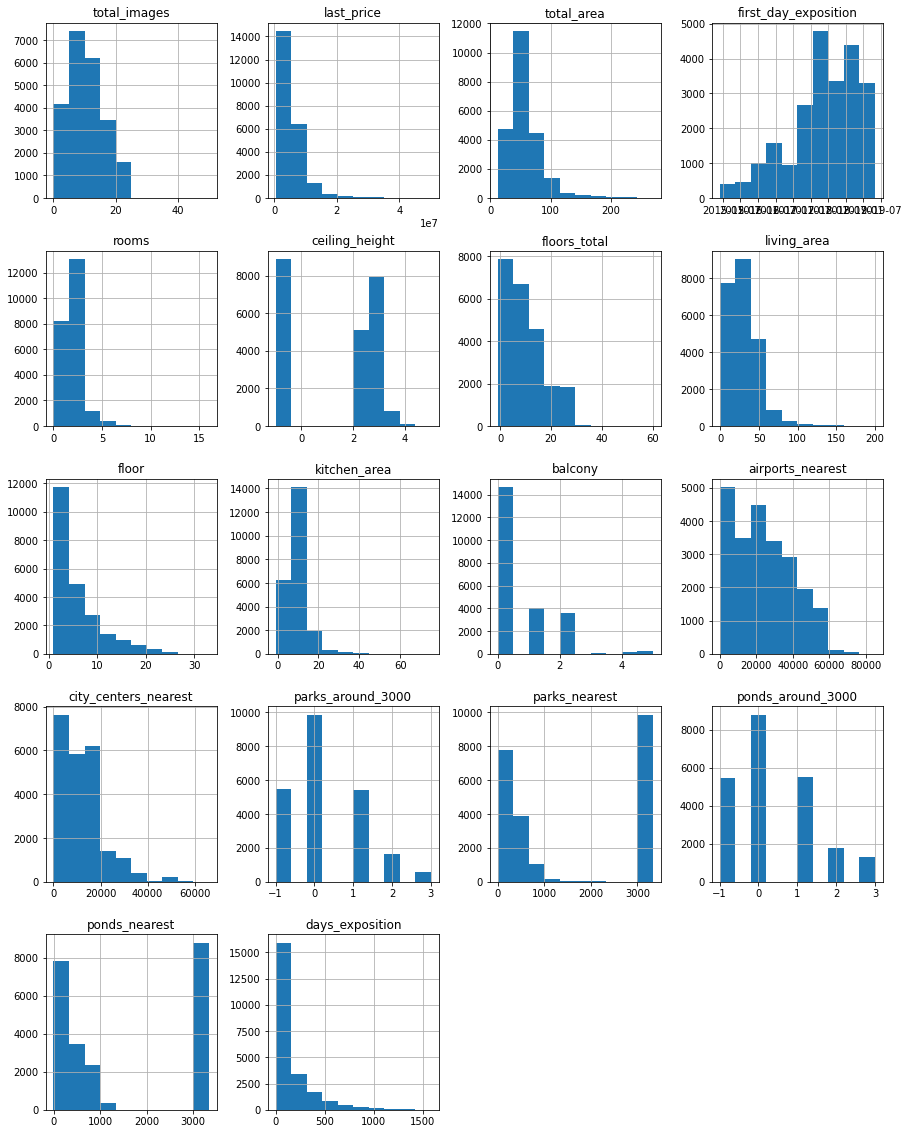

In [39]:
df.hist(figsize=(15,20))
plt.show()

В данных попрежнему присутствуют аномально большие выбросы.

Изучим столбец `rooms`. Согласно гистограмме, основные значения находятся между 0 и 7. Выведем на экран объявления о квартирах в 8 комнат и более.

In [40]:
df.loc[df['rooms'] >= 8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
648,3,"17,500,000.0",183.7,2018-07-01,11,3.4,7,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606,3148,0,3333,0,3333,-1
813,7,"16,500,000.0",229.0,2016-02-25,8,-1.0,6,160.0,5,False,False,False,25.0,0,Санкт-Петербург,23968,4536,1,243,0,3333,806
4435,13,"22,190,000.0",191.2,2017-12-05,8,2.9,6,115.8,1,False,False,False,5.0,0,Санкт-Петербург,21589,1152,1,587,2,155,115
8758,5,"16,100,000.0",150.0,2018-07-10,8,2.9,5,107.0,1,False,False,False,7.2,0,Санкт-Петербург,26080,4782,2,473,0,3333,-1
8860,12,"17,000,000.0",235.0,2018-07-14,9,3.0,6,-1.0,3,False,False,False,-1.0,0,Санкт-Петербург,24466,5034,1,346,0,3333,90
9688,8,"33,000,000.0",194.1,2017-02-07,11,3.4,5,129.0,2,False,False,False,11.9,0,Санкт-Петербург,21469,1015,1,686,2,66,813
12447,8,"19,900,000.0",210.3,2016-04-18,8,3.3,5,144.6,2,False,False,False,23.6,0,Санкт-Петербург,24770,5864,2,283,0,3333,102
13019,0,"22,250,000.0",249.9,2019-04-23,9,3.2,5,157.0,5,False,False,False,12.4,0,Санкт-Петербург,10328,9987,2,352,0,3333,-1
17203,2,"35,300,000.0",235.0,2018-11-15,8,4.0,4,162.0,3,False,False,False,26.0,0,Санкт-Петербург,19728,1799,3,123,3,50,7
18119,4,"15,500,000.0",216.1,2016-07-04,10,3.1,5,161.4,2,False,False,False,19.8,0,Санкт-Петербург,24353,4921,1,368,0,3333,11


Таких объявлений немного, и они, также относятся к обособленному типу недвижимости. Их следует удалить.

In [41]:
df = df.drop(df.loc[df['rooms'] >= 8].index)

Удалим также объявления с аномально большими площадями кухон, так как это не характерно для стандартного жилья.

In [42]:
df = df.drop(df.loc[(df['kitchen_area'] > 50) & (df['open_plan'] == False)].index)

Еще раз построим гистограммы для всех числовых столбцов таблицы, чтобы убедиться, что все аномалии и выбросы обработаны.

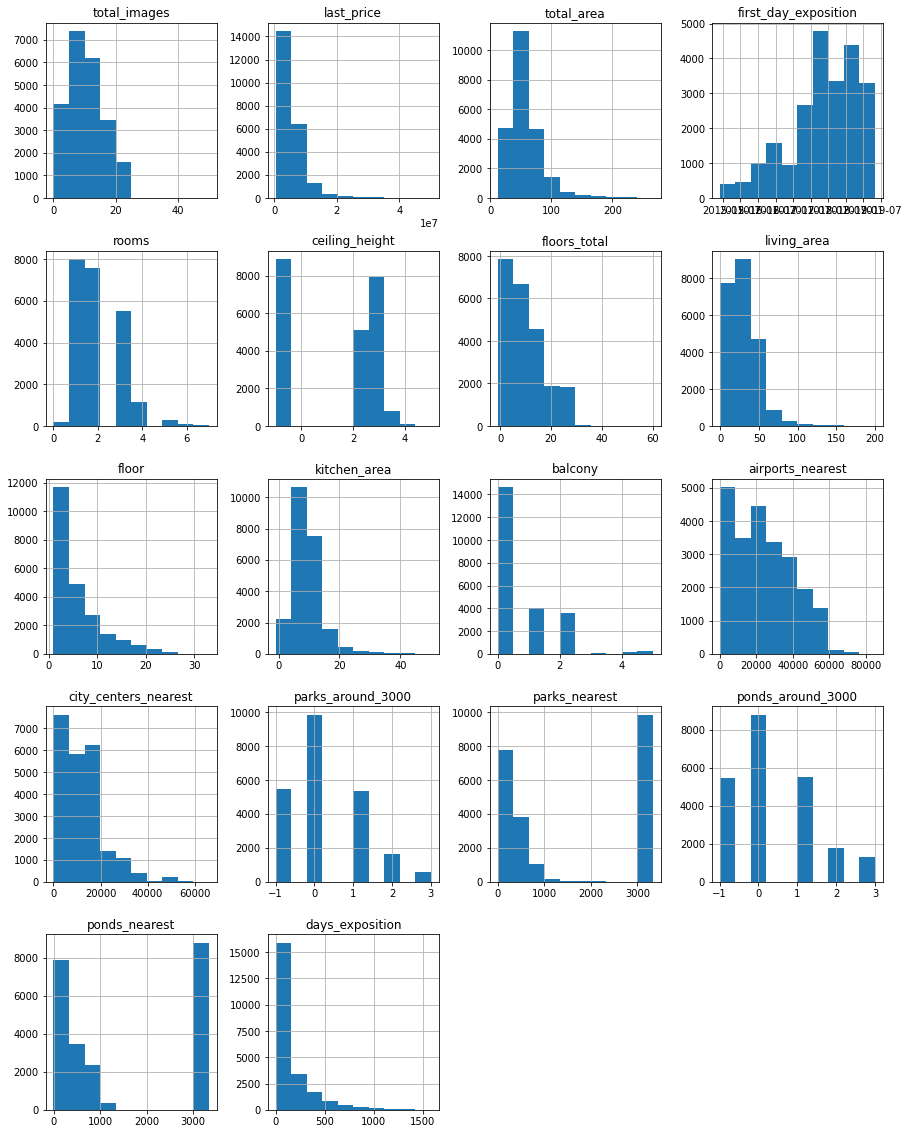

In [43]:
df.hist(figsize=(15,20))
plt.show()

**Выводы:**

В исходных данных были исправлены стилистические ошибки в заголовках и устранены неявные дубликаты в названиях населенных пунктов.

Часть пропусков удалось заполнить. Там, где логичную замену предложить невозможно, пропуски были заменены на значения `Unknown`, `-1` или `3333`.

В некоторых столбцах был изменен тип данных согласно их смысловому содержанию.
  
Из исходных данных были исключены объявления о продаже квартир премиум- и элит-класса.

В данных были обнаружены объявления, содержащие ошибки ввода или вывода. В части объявлений эти ошибки были исправлены, остальные удалены. 

### Подготовка данных для дальнейшего анализа

Для проведения анализа необходимо добавить в исходную таблицу следующие столбцы:
* цена одного квадратного метра `price_per_m2`;
* день недели публикации объявления `weekday`;
* месяц публикации объявления `month`;
* год публикации объявления `year`;
* тип этажа квартиры `floors_type`;
* расстояние до центра города в километрах `city_center_in_km`.

Объявим функцию floors_type, которая на основе данных об этаже квартиры и количества этажей в доме вернет тип этажа: "первый", "последний" или "другой".

In [44]:
def floors_type(floor, floors_total):
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

Добавим в таблицу столбцы, необходимые для анализа данных.

In [45]:
df =(
    df
    .assign(price_per_m2 = df.last_price/df.total_area)
    .assign(weekday = df.first_day_exposition.dt.weekday)
    .assign(month = df.first_day_exposition.dt.month)
    .assign(year = df.first_day_exposition.dt.year)
    .assign(floors_type = df.apply(lambda x: floors_type(x['floor'], x['floors_total']), axis = 1))
    .assign(city_center_in_km = round(df.city_centers_nearest/1000).astype(int))
    .reset_index(drop=True)
)

In [46]:
df = df[[
    'last_price',  'price_per_m2', 'total_area',
    'days_exposition', 'weekday', 'month', 'year', 
    'floors_type', 'floor',  'floors_total', 'rooms', 'ceiling_height', 'living_area', 'kitchen_area', 'balcony',
    'is_apartment', 'studio', 'open_plan',
    'locality_name',  'city_center_in_km', 'airports_nearest',
    'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 
    'city_centers_nearest',  'first_day_exposition', 'total_images'
]]

In [47]:
df.head()

,last_price,price_per_m2,total_area,days_exposition,weekday,month,year,floors_type,floor,floors_total,rooms,ceiling_height,living_area,kitchen_area,balcony,is_apartment,studio,open_plan,locality_name,city_center_in_km,airports_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,city_centers_nearest,first_day_exposition,total_images
0,"13,000,000.0","120,370.4",108.0,-1,3,3,2019,другой,8,16,3,2.7,51.0,25.0,0,False,False,False,Санкт-Петербург,16,18863,1,482,2,755,16028,2019-03-07,20
1,"3,350,000.0","82,920.8",40.4,81,1,12,2018,первый,1,11,1,-1.0,18.6,11.0,2,False,False,False,поселок Шушары,19,12817,0,3333,0,3333,18603,2018-12-04,7
2,"5,196,000.0","92,785.7",56.0,558,3,8,2015,другой,4,5,2,-1.0,34.3,8.3,0,False,False,False,Санкт-Петербург,14,21741,1,90,2,574,13933,2015-08-20,10
3,"2,890,000.0","95,065.8",30.4,55,0,9,2018,другой,5,12,1,-1.0,14.4,9.1,0,False,False,False,поселок городского типа Янино-1,0,-1,-1,-1,-1,-1,-1,2018-09-10,10
4,"3,700,000.0","99,195.7",37.3,155,3,11,2017,другой,6,26,1,-1.0,10.6,14.4,1,False,False,False,поселок Парголово,19,52996,0,3333,0,3333,19143,2017-11-02,6


### Исследовательский анализ данных

#### Анализ основных характеристик объектов недвижимости.

С целью проведения исследовательского аназиза данных построим гистограммы по основным характеристикам квартир.

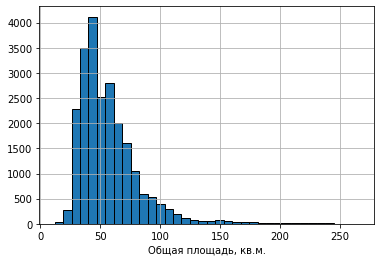

In [48]:
plt.hist(df['total_area'], bins=36, edgecolor='black')
plt.xlabel('Общая площадь, кв.м.')
plt.grid(True)

Как видно из графика больше всего предложений по квартирам площадью от 33 до 46 кв.м. и от 53 до 60 кв.м., что соответствует площади двух- и трех-комнатных квартир в малогаборитном жилье массовой застройки, иначе называемых "Хрущевки".

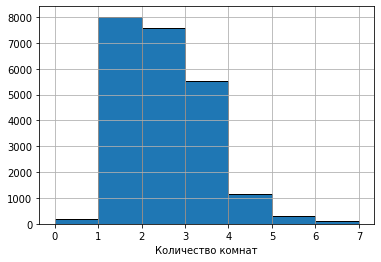

In [49]:
plt.hist(df['rooms'], bins=7, edgecolor='black')
plt.xlabel('Количество комнат')
plt.grid(True)

Гистограмма "Количество комнат" подтверждает, что самым популярным объектом недвижимости являются двух- и трехкомнатные квартиры.

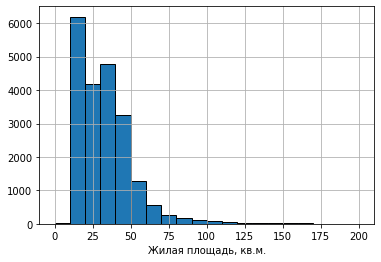

In [50]:
plt.hist(df['living_area'], bins=20, range=(0, 200), edgecolor='black')
plt.xlabel('Жилая площадь, кв.м.')
plt.grid(True)

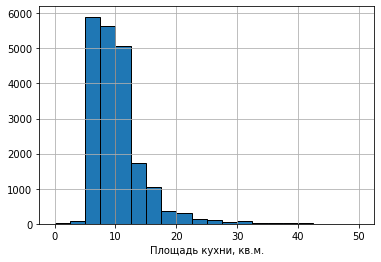

In [51]:
plt.hist(df['kitchen_area'], bins=20, range=(0, 50), edgecolor='black')
plt.xlabel('Площадь кухни, кв.м.')
plt.grid(True)

Формы графиков распределения величины жилых и кухонных площадей так же свидетельствует о большом количестве объектов малогабаритного жилья.

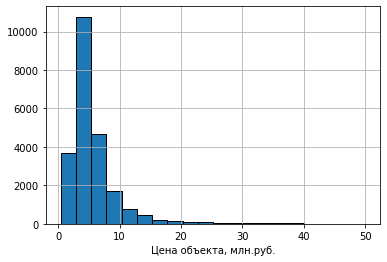

In [52]:
plt.hist((df['last_price']/1000000), bins=20, edgecolor='black')
plt.xlabel('Цена объекта, млн.руб.')
plt.grid(True)

Основная масса объявлений принадлежит к ценовой категории от 2,5 до 5 миллионов рублей

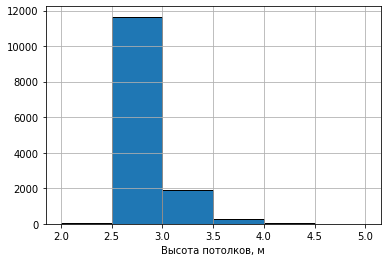

In [53]:
plt.hist(df['ceiling_height'], bins=6, range=(2, 5), edgecolor='black')
plt.xlabel('Высота потолков, м')
plt.grid(True)

Самая распространенная высота потолков в квартирах Сантк-Петербурга и пригородах от 2,5 до 3 м.

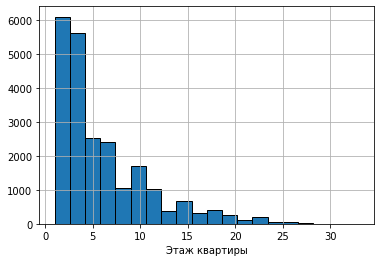

In [54]:
plt.hist(df['floor'], bins=20, edgecolor='black')
plt.xlabel('Этаж квартиры')
plt.grid(True)

В объявлениях о продаже чаще всего встречаются квартиры, расположенные на 2-4 этажах.

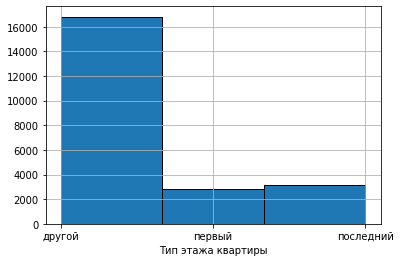

In [55]:
plt.hist(df['floors_type'], bins=3, edgecolor='black')
plt.xlabel('Тип этажа квартиры')
plt.grid(True)

Предложений по квартирам, расположенным на последнем этаже больше, чем на первом. 

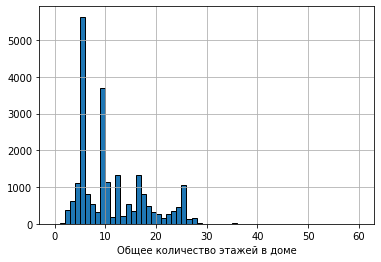

In [56]:
plt.hist(df['floors_total'], bins=60, range=(0,60), edgecolor='black')
plt.xlabel('Общее количество этажей в доме')
plt.grid(True)

Основная масса объявлений - это квартиры в пяти- и девятиэтажных домах.

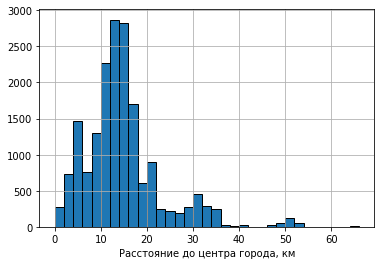

In [57]:
plt.hist((df['city_centers_nearest']/1000), bins=33, range=(0, 66), edgecolor='black')
plt.xlabel('Расстояние до центра города, км')
plt.grid(True)

По мере удаления от центра Санкт-Петербурга, количество предложений увеличивается, достигая максимума на расстоянии 12-16 км, затем наблюдается спад.

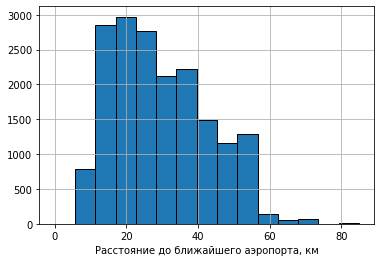

In [58]:
plt.hist((df['airports_nearest']/1000), bins=15, range=(0, 85), edgecolor='black')
plt.xlabel('Расстояние до ближайшего аэропорта, км')
plt.grid(True)

Большинство объявлений касается квартир, расположенных в радиусе от 10 до 30 км. от аэропорта.

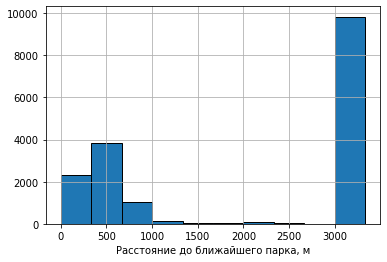

In [59]:
plt.hist(df['parks_nearest'], bins=10, range=(0, 3333), edgecolor='black')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.grid(True)

Квартир, от которых в радиусе 3 км нет ни одного парка, в объявлениях о продаже больше всего.

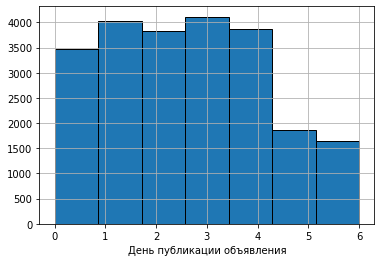

In [60]:
plt.hist(df['weekday'], bins=7, edgecolor='black')
plt.xlabel('День публикации объявления')
plt.grid(True)

Наименьшее количество объявлений публикуется в выходные. Возможно, это связано с тем, что собственники квартир чаще обращаются к услугам профессиональных посредников, чем самостоятельно занимаются продажей. 

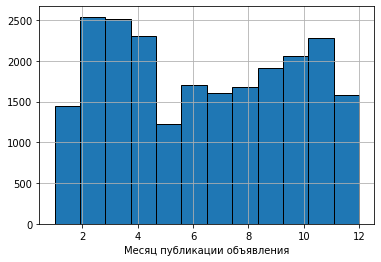

In [61]:
plt.hist(df['month'], bins=12, edgecolor='black')
plt.xlabel('Месяц публикации объявления')
plt.grid(True)

Гистограмма "Месяц публикации объявления" свидетельствует о наличии сезонности на рынке купли-продажи квартир. Ярко выраженный пик предложений приходится на период февраль-апрель, затем резкий спад и постепенное увеличение к ноябрю, и очередной спад в декабре.

**Выводы:**

Большинство предложений на рынке недвижимости относятся к малогабаритным объектам массовой застройки.

При удалении от центра Санкт-Петербурга количество предложений возрастает, достигая пика на расстоянии около 15 км, после чего наблюдается снижение.

Рынок недвижимости характеризуется выраженной сезонностью.

В выходные дни публикуется гораздо меньше объявлений по сравнению с буднями, что можно объяснить предпочтением собственников обращаться к услугам профессиональных посредников.


#### Анализ длительности размещения объявлений о продаже объектов недвижимости

Для того, чтобы увидеть как быстро продавались квартиры, отсеим еще не проданные объекты, затем построим гистограмму  и воспользуемся методом describe() для создания описательной статистики столбца `days_exposition`.

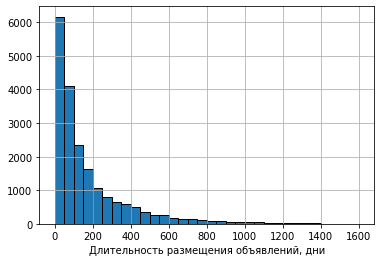

In [62]:
plt.hist(df['days_exposition'], bins=32, range=(0,1600), edgecolor='black')
plt.xlabel('Длительность размещения объявлений, дни')
plt.grid(True)

Почти четверть квартир были проданы в течении первых двух месяцев с момента размещения объявления.

In [63]:
df.loc[(df['days_exposition'] != -1), ['days_exposition']].describe()

,days_exposition
count,"19,850.0"
mean,177.7
std,216.1
min,1.0
25%,44.0
50%,94.0
75%,226.0
max,"1,580.0"


В среднем квартиры продаются за 5-6 месяцев, но половина объектов из архива данных были проданы примерно за 3 месяца, четверть - менее чем за 44 дня, а еще четверть - более чем за 7,5 месяцев. Большая разница между средним и медианой обусловлена наличием нескольких квартир с необычно долгими сроками продаж. О значительном разбросе сроков продаж так же свидетельствует и значение показателя "стандартное отклонение".

Рассмотрим более внимательно распределение сроков продаж квартир ниже медианного значения.

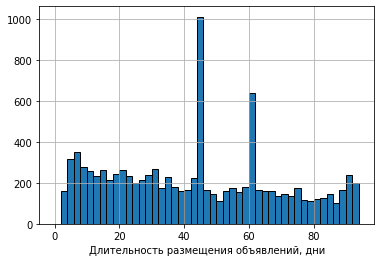

In [64]:
plt.hist(df['days_exposition'], bins=47, range=(0,94), edgecolor='black')
plt.xlabel('Длительность размещения объявлений, дни')
plt.grid(True)

In [65]:
df\
.loc[((df['days_exposition'] != -1) & (df['days_exposition'] <= 94))]\
.groupby('days_exposition')['last_price'].count().sort_values(ascending=False)\
.head(5)

days_exposition
45    873
60    534
7     229
30    204
4     173
Name: last_price, dtype: int64

Наличие ярко выраженных пиков на 45 и 60 дни размещения - это особенность функционирования системы размещения. Она  предусматривает автоматическое снятие бесплатного объявления на 45, 60, 90 или 365 день в зависимости от вида объекта, его стоимости и местоположения. То есть в более чем 1400 объявлений из архива реальный срок продажи отличен, от указаного в данных.

**Выводы:** 

Примерно 7% объявлений содержат неверную информацию о сроках продажи. 

В среднем продажа квартиры занимает примерно 5-6 месяцев, однако данные о сроках имеют значительную вариацию.

Продажи, завершенные в течение 45 дней, можно считать быстрыми, а продажи, которые занимают более 8 месяцев - долгими.

#### Анализ факторов, влияющих на стоимость объекта недвижимости.

Построим диаграммы рассеяния, чтобы определить влияние на стоимость квартиры таких факторов как общая, жилая и кухонная площади.

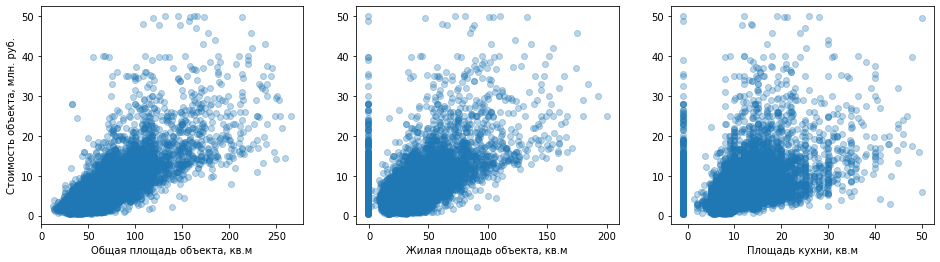

In [66]:
_, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].scatter(df['total_area'], (df['last_price']/1000000), alpha=0.3)
ax[0].set_xlabel('Общая площадь объекта, кв.м')
ax[0].set_ylabel('Стоимость объекта, млн. руб.')
ax[1].scatter(df['living_area'], (df['last_price']/1000000), alpha=0.3)
ax[1].set_xlabel('Жилая площадь объекта, кв.м')
ax[2].scatter(df['kitchen_area'], (df['last_price']/1000000), alpha=0.3)
ax[2].set_xlabel('Площадь кухни, кв.м')
plt.show()

Все три фактора оказывают прямое влияние на стоимость объекта недвижимости, но эта зависимость не прямо пропорциональна. Поскольку в данных о жилой и кухонных площадях были пропуски, заполненные значением `-1`, то на соответствующих диаграммах присутствуют точки по оси ординат равные -1.

Исследуем влияние количества комнат на стоимость квартиры.

In [67]:
f_room = df.pivot_table(index='rooms', values='last_price')/1000000
f_room

,last_price
rooms,
0,2.9
1,3.8
2,5.1
3,7.1
4,11.1
5,15.6
6,17.9
7,20.0


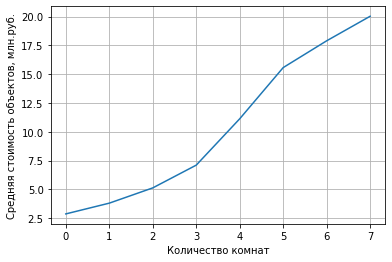

In [68]:
f_room.plot(y='last_price', legend=False)
plt.xlabel('Количество комнат')
plt.ylabel('Средняя стоимость объектов, млн.руб.')
plt.grid(True)

Согласно графику с увеличением количества комнат стоимость квартиры также увеличивается. При этом увеличение числа комнат  с 3 до 4 и с 4 до 5 генерирует наиболее резкое увеличение стоимости.

Исследуем влияние типа этажа на стоимость квартиры.

In [69]:
f_floor = df.pivot_table(index='floors_type', values='last_price')/1000000
f_floor

,last_price
floors_type,
другой,5.9
первый,4.4
последний,5.4


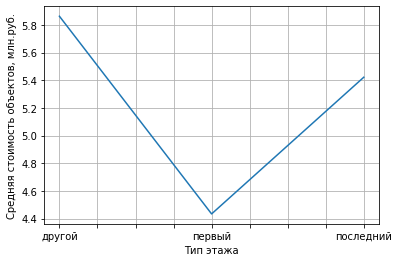

In [70]:
f_floor.plot(y='last_price', legend=False)
plt.xlabel('Тип этажа')
plt.ylabel('Средняя стоимость объектов, млн.руб.')
plt.grid(True)

Квартиры на последнем этаже, в среднем дороже, чем на первом, но дешевле тех, что находятся между ними.

Исследуем влияние дня недели публикации объявления о продаже на стоимость квартиры.

In [71]:
f_weekday = df.pivot_table(index='weekday', values='last_price')/1000
f_weekday

,last_price
weekday,
0,"5,655.3"
1,"5,627.6"
2,"5,725.2"
3,"5,720.5"
4,"5,605.1"
5,"5,340.6"
6,"5,430.7"


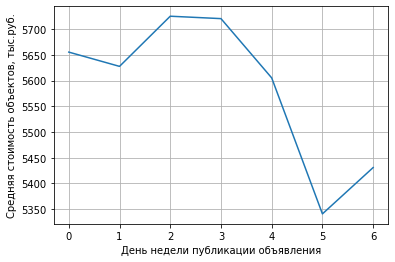

In [72]:
f_weekday.plot(y='last_price', legend=False)
plt.xlabel('День недели публикации объявления')
plt.ylabel('Средняя стоимость объектов, тыс.руб.')
plt.grid(True)

Средняя стоимость, в объявлениях опубликованных в выходные, заметно ниже. Вероятно, это связано с тем, что в выходные публикуются объявления непосредственно собственниками жилья, а значит, в его стоимости отсутствует комиссия посредников.

Исследуем влияние месяца публикации объявления о продаже на стоимость квартиры.

In [73]:
f_month = df.pivot_table(index='month', values='last_price')/1000
f_month

,last_price
month,
1,"5,666.5"
2,"5,590.1"
3,"5,601.6"
4,"5,630.9"
5,"5,619.8"
6,"5,553.4"
7,"5,557.3"
8,"5,597.1"
9,"5,728.1"


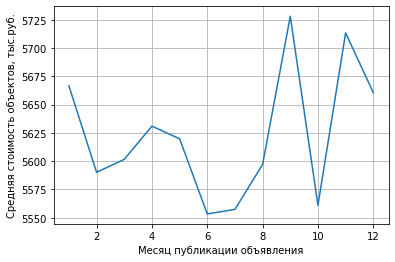

In [74]:
f_month.plot(y='last_price', legend=False)
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Средняя стоимость объектов, тыс.руб.')
plt.grid(True)

Цены на квартиры подвержены сезонным колебаниям. Минимальные цены наблюдаются в июне. Дороже всего квартиры стоят в сентябре.

Исследуем влияние года публикации объявления о продаже на стоимость квартиры.

In [75]:
f_year = df.pivot_table(index='year', values='last_price')/1000000
f_year

,last_price
year,
2014,8.9
2015,6.6
2016,5.7
2017,5.5
2018,5.4
2019,5.9


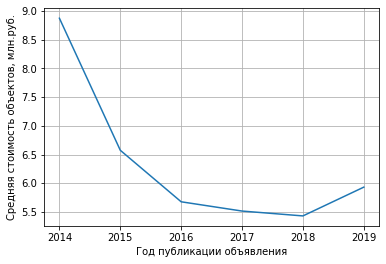

In [76]:
f_year.plot(y='last_price', legend=False)
plt.xlabel('Год публикации объявления')
plt.ylabel('Средняя стоимость объектов, млн.руб.')
plt.grid(True)

На графике изменения средней стоимости объектов недвижимости наблюдается резкий спад в 2014г, за которым следует более плавное снижение цен,  достигнувшее своего минимума в 2018 году. После этого начался постепенный рост. Такая динамика кривой объясняется существенными изменениями в международной геополитической обстановке.

**Выводы:**

Общая, жилая и кухонная площади оказывают прямое, но нелинейное влияние на стоимость квартиры.

Существует положительная зависимость между количеством комнат и стоимостью квартиры, при этом наиболее существенное увеличение цены происходит при увеличении числа комнат с 3 до 4 и с 4 до 5.

Квартиры на последнем этаже обычно дороже, чем на первом, но дешевле, чем квартиры, находящиеся между этими этажами.

В среднем, стоимость объекта в объявлениях, опубликованных в выходные дни, ниже, возможно, из-за отсутствия комиссии посредников, поскольку такие объявления чаще публикуются собственниками.

Цены на квартиры подвержены сезонным колебаниям и чувствительны к изменениям в международной геополитической обстановке.

#### Анализ средней цены за 1 кв.метр в 10 населённых пунктах с наибольшим числом объявлений

Определим 10 населённых пунктов с наибольшим числом объявлений.

In [77]:
top_10 = df.pivot_table(index='locality_name', values='last_price', aggfunc='count').nlargest(10, 'last_price')
top_10.columns = ['num_of_ads']
top_10

,num_of_ads
locality_name,
Санкт-Петербург,14963
поселок Мурино,556
поселок Шушары,438
Всеволожск,392
Пушкин,355
Колпино,334
поселок Парголово,327
Гатчина,304
деревня Кудрово,298


Вычислим среднюю цену за 1 кв.метр в 10 населённых пунктах с наибольшим числом объявлений.

In [78]:
df_top_10 = df.query('locality_name in @top_10.index')
m2_top_10 = (
    df_top_10
    .pivot_table(index='locality_name', values='price_per_m2')
    .sort_values(by='price_per_m2', ascending=False)/1000
)
m2_top_10

,price_per_m2
locality_name,
Санкт-Петербург,110.6
Пушкин,102.4
деревня Кудрово,92.5
поселок Парголово,90.2
поселок Мурино,85.7
поселок Шушары,78.7
Колпино,75.3
Гатчина,68.9
Всеволожск,68.9


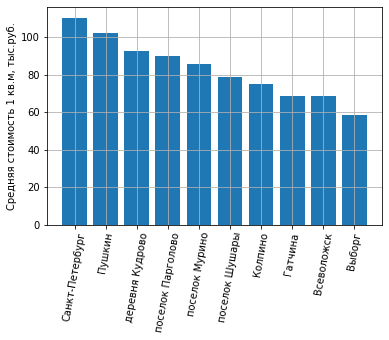

In [79]:
plt.bar(x=m2_top_10.index, height=m2_top_10['price_per_m2'])
plt.ylabel('Средняя стоимость 1 кв.м, тыс.руб.')
plt.xticks(rotation=80)
plt.grid(True)

**Выводы:**

Две трети объявлений - это квартиры, расположенные в Санкт-Петербурге.

Из 10 населенных пунктов, наиболее часто встречающихся в объявлениях о продаже, самый дорогой кв.метр в Санкт-Петербурге, а самый дешевый - в Выборге.

#### Анализ стоимости объектов недвижимости Санкт-Петербурга в зависити от расстояния до центра города

Сделаем срез данных по объектам из Санкт-Петербурга, по которым есть картографические данные.

In [80]:
df_spb = df.query("locality_name == 'Санкт-Петербург' and city_centers_nearest >= 0")
df_spb.head()

,last_price,price_per_m2,total_area,days_exposition,weekday,month,year,floors_type,floor,floors_total,rooms,ceiling_height,living_area,kitchen_area,balcony,is_apartment,studio,open_plan,locality_name,city_center_in_km,airports_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,city_centers_nearest,first_day_exposition,total_images
0,"13,000,000.0","120,370.4",108.0,-1,3,3,2019,другой,8,16,3,2.7,51.0,25.0,0,False,False,False,Санкт-Петербург,16,18863,1,482,2,755,16028,2019-03-07,20
2,"5,196,000.0","92,785.7",56.0,558,3,8,2015,другой,4,5,2,-1.0,34.3,8.3,0,False,False,False,Санкт-Петербург,14,21741,1,90,2,574,13933,2015-08-20,10
5,"7,915,000.0","110,544.7",71.6,-1,3,4,2019,другой,22,24,2,-1.0,-1.0,18.9,2,False,False,False,Санкт-Петербург,12,23982,0,3333,0,3333,11634,2019-04-18,5
7,"5,400,000.0","88,524.6",61.0,289,6,2,2017,другой,7,9,3,2.5,43.6,6.5,2,False,False,False,Санкт-Петербург,15,50898,0,3333,0,3333,15008,2017-02-26,18
8,"5,050,000.0","127,525.3",39.6,137,3,11,2017,другой,3,12,1,2.7,20.3,8.5,0,False,False,False,Санкт-Петербург,14,38357,1,310,2,553,13878,2017-11-16,5


Вычислим среднюю цену за 1 кв.метр в зависимости от расстояния до центра города с шагом в один километр.

In [81]:
m2_spb = df_spb.pivot_table(index='city_center_in_km', values='price_per_m2')/1000
m2_spb

,price_per_m2
city_center_in_km,
0,149.7
1,146.4
2,136.4
3,117.0
4,125.7
5,132.7
6,132.9
7,136.3
8,122.3


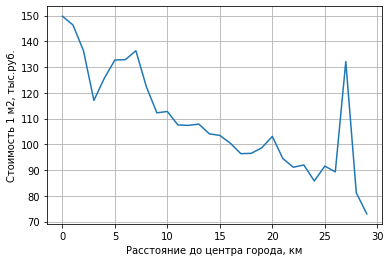

In [82]:
m2_spb.plot(y='price_per_m2', legend=False)
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Стоимость 1 м2, тыс.руб.')
plt.grid(True)

**Выводы:**

В целом, с увеличеним расстояния до центра города цена за 1 кв.метр снижается. 

Наблюдается резкое падение цены на 3 километре от центра и резкий скачок на 27.

### Общий вывод

В представленных на анализ данных содержались пропуски и аномалии. Пропуски были заполнены подходящими по смыслу значениями или "Заглушкой". Аномалии были частично исправлены, частично удалены. Названия населенных пунтков приведены к общему виду. Также были исключены объявления о продаже квартир премиум- и элит-класса.

Данные были исследованы на наличие особенностей, существующих на рынке недвижимости в Санкт-Петербурге и соседних населённых пунктах.

Анализ предоставленных данных позволяет сделать следующие выводы:

* Большинство предложений относится к малогабаритным объектам массовой застройки. Количество предложений возрастает на расстоянии около 15 км от центра Санкт-Петербурга, затем снижается.


* Средняя продолжительность продажи квартиры составляет примерно 5-6 месяцев. Быстрыми можно считать те продажи, которые совершаются в течение 45 дней, а долгими — которые осуществляются более чем через 8 месяцев. 


* Основная масса объявлений принадлежит к ценовой категории от 2,5 до 5 млн. рублей.


* Рынок недвижимости характеризуется сезонностью. Ярко выраженный пик предложений приходится на период февраль-апрель (более 5 000 за исследуемый период). Минимальная средняя стоимость квартиры наблюдаются в июне (5,55 млн. рублей). Дороже всего квартиры стоят в сентябре (в среднем 5,73 млн. рублей).


* В выходные дни публикуется меньше объявлений, чем в будни. Средняя стоимость объектов, указанная в них, ниже, чем в объявлениях, опубликованных в рабочие дни (5,4 млн. рублей против 5,7 млн. рублей в середине недели).


* Стоимость объектов недвижимости чувствительна к изменениям в международной геополитической обстановке. В течении 2014 года средняя стоимость квартиры упала более чем на 2 млн. рублей. Затем падение замедлилось, достигнув дна в 2018. На начало 2019 года цены восстановились до значений середины 2015.


* С увеличением количества комнат растет и стоимость квартиры. Наиболее существенное увеличение цены наблюдается при увеличении числа комнат с 3 до 4 и с 4 до 5.


*	Большая часть объявлений (две трети) относится к квартирам, расположенным в Санкт-Петербурге. В этом городе наблюдается и самая высокая средняя цена за 1 кв. метр (110,6 тыс. рублей).


* Цены за 1 кв.метр в Санкт-Петербурге плавно снижаются по мере удаления от центра города, но есть резкое падение цены на расстоянии 3 километра от центра и скачок на 27 километре.


* Среди 10 населенных пунктов, наиболее часто встречающихся в объявлениях о продаже, самая низкая цена за 1 кв. метр в Выборге (58,5 тысяч рублей).
